In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,mean_squared_error,mean_absolute_error,r2_score
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [2]:
df=pd.read_csv("Life-Expectancy-Data.csv")
country=df["Country"].unique()

print(df["Country"].nunique())
print(df.isnull().sum())
print(df.info())
print(df.iloc[0:5])
print(df.describe())


193
Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV                                 0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column       

In [3]:
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV                               0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64


In [4]:
df.shape

(1649, 22)

In [5]:
print(df)

          Country  Year      Status  Adult Mortality  infant deaths  Alcohol  \
0     Afghanistan  2015  Developing            263.0             62     0.01   
1     Afghanistan  2014  Developing            271.0             64     0.01   
2     Afghanistan  2013  Developing            268.0             66     0.01   
3     Afghanistan  2012  Developing            272.0             69     0.01   
4     Afghanistan  2011  Developing            275.0             71     0.01   
...           ...   ...         ...              ...            ...      ...   
2933     Zimbabwe  2004  Developing            723.0             27     4.36   
2934     Zimbabwe  2003  Developing            715.0             26     4.06   
2935     Zimbabwe  2002  Developing             73.0             25     4.43   
2936     Zimbabwe  2001  Developing            686.0             25     1.72   
2937     Zimbabwe  2000  Developing            665.0             24     1.68   

      percentage expenditure  Hepatitis

In [6]:
X=df.drop(columns=["Life expectancy","Country","Status"])
y=df[["Life expectancy"]]

print(X.head())
print(y.head())

   Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0  2015            263.0             62     0.01               71.279624   
1  2014            271.0             64     0.01               73.523582   
2  2013            268.0             66     0.01               73.219243   
3  2012            272.0             69     0.01               78.184215   
4  2011            275.0             71     0.01                7.097109   

   Hepatitis B  Measles    BMI   under-five deaths   Polio  Total expenditure  \
0         65.0      1154   19.1                  83    6.0               8.16   
1         62.0       492   18.6                  86   58.0               8.18   
2         64.0       430   18.1                  89   62.0               8.13   
3         67.0      2787   17.6                  93   67.0               8.52   
4         68.0      3013   17.2                  97   68.0               7.87   

   Diphtheria    HIV         GDP  Population   thinness 

In [7]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=4)

In [8]:
correlation_matrix= X.corr()

In [9]:
print(correlation_matrix)

                                     Year  Adult Mortality  infant deaths  \
Year                             1.000000        -0.037092       0.008029   
Adult Mortality                 -0.037092         1.000000       0.042450   
infant deaths                    0.008029         0.042450       1.000000   
Alcohol                         -0.113365        -0.175535      -0.106217   
percentage expenditure           0.069553        -0.237610      -0.090765   
Hepatitis B                      0.114897        -0.105225      -0.231769   
Measles                         -0.053822        -0.003967       0.532680   
 BMI                             0.005739        -0.351542      -0.234425   
under-five deaths                0.010479         0.060365       0.996906   
Polio                           -0.016699        -0.199853      -0.156929   
Total expenditure                0.059493        -0.085227      -0.146951   
Diphtheria                       0.029641        -0.191429      -0.161871   

In [23]:
import seaborn as sns
 

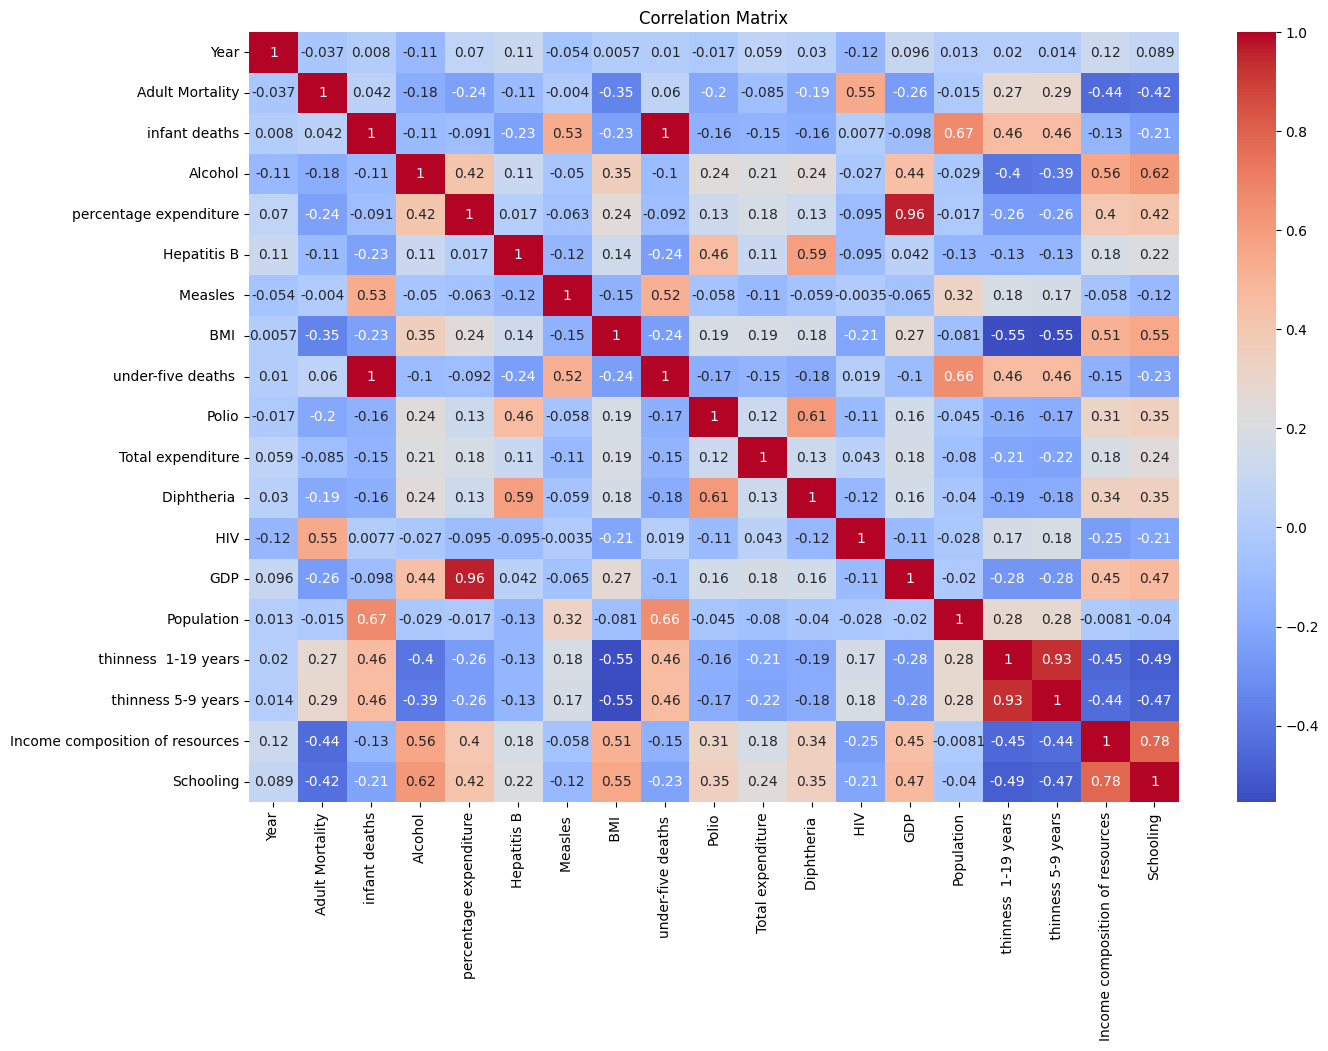

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [34]:
lr_model= LinearRegression()
lr_model.fit(x_train,y_train)
lr_model_preds= lr_model.predict(x_test)
print(f"MSE={mean_squared_error(y_true=y_test,y_pred=lr_model_preds)}")
print(f"MAE={mean_absolute_error(y_true=y_test,y_pred=lr_model_preds)}")
print(f"R2 Score={r2_score(y_true=y_test,y_pred= lr_model_preds)}")



MSE=12.748068148120428
MAE=2.6575455531945527
R2 Score=0.8123886166589885
